In [4]:
import pandas as pd

In [7]:

file_path = '/home/delhivery/Desktop/skyhack/reason18315ff.csv'
data = pd.read_csv(file_path)

# Show the initial data
print(data.head(1))
# print(data["call_id"])












      call_id primary_call_reason
0  4667960400   Voluntary  Cancel


In [41]:

reason_counts = data['primary_call_reason'].value_counts()
# Get the top 10 most frequent reasons
top_10_reasons = reason_counts.head(10)
print(top_10_reasons)



primary_call_reason
IRROPS                   13057
Voluntary Change         10291
Seating                   6223
Mileage Plus              5487
Post-Flight               3869
Communications            3779
Products and Services     2792
Upgrade                   2682
Baggage                   2616
Booking                   2589
Name: count, dtype: int64


In [44]:
import pandas as pd

# Load customer data
file_path_customers = '/home/delhivery/Desktop/skyhack/customers2afd6ea.csv'
customers = pd.read_csv(file_path_customers)


file_path = '/home/delhivery/Desktop/skyhack/callsf0d4f5a.csv'
calls_data = pd.read_csv(file_path)

file='/home/delhivery/Desktop/skyhack/reason18315ff.csv'
reasons=pd.read_csv(file)




In [45]:
# Assuming 'customer_id' is the common field and exists in 'reasons' data
# Merge the data on 'customer_id' if this field is present in both datasets
merged_data = pd.merge(customers, calls_data, on='customer_id', how='inner')

# Correctly get the count of unique 'agent_id' values
unique_agent_count = len(merged_data['agent_id'].unique())

# Print the result
print(merged_data)




       customer_id         customer_name  elite_level_code     call_id  \
0       2033123310        Matthew Foster               4.0  4667960400   
1       8186702651         Tammy Walters               NaN  1122072124   
2       2416856629         Jeffery Dixon               NaN  6834291559   
3       1154544516         David Wilkins               2.0  2266439882   
4       5214456437     Elizabeth Daniels               0.0  1211603231   
...            ...                   ...               ...         ...   
71805   8022667294  Dennis Singleton DDS               NaN  1563273072   
71806   4474867021         Paul Mitchell               1.0  8865997781   
71807   9762042472           Kaylee Lang               NaN  8019240181   
71808   8095620266       Christine Oneal               1.0  8332067080   
71809   8014388758       Alicia Calderon               0.0  8210720833   

       agent_id call_start_datetime agent_assigned_datetime call_end_datetime  \
0        963118     7/31/2024 

In [46]:
new_merge=pd.merge(merged_data,reasons, on='call_id',how="inner")
print(new_merge.head(0))

Empty DataFrame
Columns: [customer_id, customer_name, elite_level_code, call_id, agent_id, call_start_datetime, agent_assigned_datetime, call_end_datetime, call_transcript, primary_call_reason]
Index: []


In [47]:
# Create a contingency table
contingency_table = pd.crosstab(new_merge['primary_call_reason'], new_merge['elite_level_code'])

# Print the contingency table
print(contingency_table)


elite_level_code          0.0   1.0   2.0  3.0  4.0  5.0
primary_call_reason                                     
 Baggage                   24    19     8    6    0    0
Baggage                   531   581   269  188    0    0
Baggage                    28    33    13    8    0    0
Booking                   520   512   246  184   61   26
Booking                     5    11     4    2    1    0
Check In                   74    80    35   32    8    6
Check-In                  299   271   157  114   34   13
Check-In                    3     9     4    2    1    1
Checkout                  388   342   190  121   34   19
Checkout                    7     8     6    3    0    1
Communications            740   791   392  269   76   32
Communications              7    13     3    5    2    0
Digital   Support          23    37     9   12    3    0
Digital  Support           18    16    10    4    0    1
Digital Support           203   214   101   68   16   12
Digital Support             3  

In [53]:
# Manual mapping dictionary for call reasons
reason_mapping = {
    'baggage': 'baggage',
    'baggage ': 'baggage',
    'booking': 'booking',
    'booking ': 'booking',
    'check in': 'check in',
    'check-in': 'check in',
    'check-in ': 'check in',
    'checkout': 'checkout',
    'checkout ': 'checkout',
    'communications': 'communications',
    'communications ': 'communications',
    'digital support': 'digital support',
    'digital  support': 'digital support',
    'digital   support': 'digital support',
    'disability': 'disability',
    'disability ': 'disability',
    'etc': 'etc',
    'etc ': 'etc',
    'irrops': 'irrops',
    'irrops ': 'irrops',
    'mileage plus': 'mileage plus',
    'mileage  plus': 'mileage plus',
    'mileage   plus': 'mileage plus',
    'other topics': 'other topics',
    'other  topics': 'other topics',
    'post flight': 'post flight',
    'post-flight': 'post flight',
    'post-flight ': 'post flight',
    'products & services': 'products and services',
    'products and services': 'products and services',
    'products and services ': 'products and services',
    'schedule change': 'schedule change',
    'schedule change ': 'schedule change',
    'seating': 'seating',
    'seating ': 'seating',
    'traveler updates': 'traveler updates',
    'traveler  updates': 'traveler updates',
    'traveler   updates': 'traveler updates',
    'unaccompanied minor': 'unaccompanied minor',
    'upgrade': 'upgrade',
    'upgrade ': 'upgrade',
    'voluntary change': 'voluntary change',
    'voluntary  change': 'voluntary change',
    'voluntary   change': 'voluntary change',
    'voluntary cancel': 'voluntary cancel',
    'voluntary  cancel': 'voluntary cancel',
    'voluntary   cancel': 'voluntary cancel',
}

# Assuming 'data' is your DataFrame loaded with the call reason data
new_merge['primary_call_reason'] = new_merge['primary_call_reason'].str.lower().str.strip().replace(reason_mapping, regex=True)

# Check if the mapping is applied correctly
print(data['primary_call_reason'].value_counts())

contingency_table = pd.crosstab(new_merge['primary_call_reason'], new_merge['elite_level_code'])
print(contingency_table)



primary_call_reason
irrops                   13311
voluntary change         10648
seating                   6365
mileage plus              5722
post flight               4330
communications            3840
products and services     2856
baggage                   2832
upgrade                   2738
booking                   2637
check in                  1904
checkout                  1888
voluntary cancel          1607
digital support           1089
etc                        952
traveler updates           820
other topics               818
schedule change            731
products & services        476
disability                 403
voluntary  change          200
digital  support           136
mileage  plus              129
traveler  updates          117
unaccompanied minor        104
Name: count, dtype: int64
elite_level_code        0.0   1.0   2.0   3.0  4.0  5.0
primary_call_reason                                    
baggage                 583   633   290   202    0    0
booking    

In [55]:
from scipy.stats import chi2_contingency

# Chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")


Chi-squared Statistic: 3943.3998314671703
Degrees of Freedom: 95


In [56]:
sentiment=

,customer_id,customer_name,elite_level_code,call_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason
0,2033123310,Matthew Foster,4.0,4667960400,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,voluntary cancel
1,8186702651,Tammy Walters,NaN,1122072124,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,booking
2,2416856629,Jeffery Dixon,NaN,6834291559,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,irrops
3,1154544516,David Wilkins,2.0,2266439882,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,upgrade
4,5214456437,Elizabeth Daniels,0.0,1211603231,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,seating
...,...,...,...,...,...,...,...,...,...,...
66648,7367304988,Kevin Warner,2.0,7569738090,783441,8/31/2024 23:51,8/31/2024 23:57,9/1/2024 0:07,\n\nAgent: Thank you for calling United Airlin...,mileage plus
66649,8022667294,Dennis Singleton DDS,NaN,1563273072,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,post flight
66650,4474867021,Paul Mitchell,1.0,8865997781,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,upgrade
66651,9762042472,Kaylee Lang,NaN,8019240181,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,upgrade


In [57]:

df2=pd.read_csv("/home/delhivery/Desktop/skyhack/sentiment_statisticscc1e57a.csv")
merged_df = pd.merge(new_merge, df2, on='call_id', how='inner')


In [59]:
merged_df

,customer_id,customer_name,elite_level_code,call_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,2033123310,Matthew Foster,4.0,4667960400,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,voluntary cancel,963118,neutral,angry,-0.04,0.39
1,8186702651,Tammy Walters,NaN,1122072124,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,booking,519057,calm,neutral,0.02,0.35
2,2416856629,Jeffery Dixon,NaN,6834291559,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,irrops,158319,neutral,polite,-0.13,0.32
3,1154544516,David Wilkins,2.0,2266439882,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,upgrade,488324,neutral,frustrated,-0.20,0.20
4,5214456437,Elizabeth Daniels,0.0,1211603231,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,seating,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7367304988,Kevin Warner,2.0,7569738090,783441,8/31/2024 23:51,8/31/2024 23:57,9/1/2024 0:07,\n\nAgent: Thank you for calling United Airlin...,mileage plus,783441,neutral,frustrated,-0.19,0.51
66649,8022667294,Dennis Singleton DDS,NaN,1563273072,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,post flight,413148,calm,calm,0.05,0.34
66650,4474867021,Paul Mitchell,1.0,8865997781,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,upgrade,980156,calm,frustrated,0.03,0.22
66651,9762042472,Kaylee Lang,NaN,8019240181,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,upgrade,616988,calm,polite,0.05,0.42


In [91]:

merged_df['agent_assigned_datetime'] = pd.to_datetime(merged_df['agent_assigned_datetime'])
merged_df['call_end_datetime'] = pd.to_datetime(merged_df['call_end_datetime'])
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])

merged_df['handle_time'] = (merged_df['call_end_datetime'] - merged_df['agent_assigned_datetime']).dt.total_seconds() / 60
merged_df['wait_time'] = (merged_df['agent_assigned_datetime'] - merged_df['call_start_datetime']).dt.total_seconds() / 60




In [92]:
# Manual mapping dictionary for call reasons
reason_mapping = {
    'baggage': 'baggage',
    'baggage ': 'baggage',
    'booking': 'booking',
    'booking ': 'booking',
    'check in': 'check in',
    'check-in': 'check in',
    'check-in ': 'check in',
    'checkout': 'checkout',
    'checkout ': 'checkout',
    'communications': 'communications',
    'communications ': 'communications',
    'digital support': 'digital support',
    'digital  support': 'digital support',
    'digital   support': 'digital support',
    'disability': 'disability',
    'disability ': 'disability',
    'etc': 'etc',
    'etc ': 'etc',
    'irrops': 'irrops',
    'irrops ': 'irrops',
    'mileage plus': 'mileage plus',
    'mileage  plus': 'mileage plus',
    'mileage   plus': 'mileage plus',
    'other topics': 'other topics',
    'other  topics': 'other topics',
    'post flight': 'post flight',
    'post-flight': 'post flight',
    'post-flight ': 'post flight',
    'products & services': 'products and services',
    'products and services': 'products and services',
    'products and services ': 'products and services',
    'schedule change': 'schedule change',
    'schedule change ': 'schedule change',
    'seating': 'seating',
    'seating ': 'seating',
    'traveler updates': 'traveler updates',
    'traveler  updates': 'traveler updates',
    'traveler   updates': 'traveler updates',
    'unaccompanied minor': 'unaccompanied minor',
    'upgrade': 'upgrade',
    'upgrade ': 'upgrade',
    'voluntary change': 'voluntary change',
    'voluntary  change': 'voluntary change',
    'voluntary   change': 'voluntary change',
    'voluntary cancel': 'voluntary cancel',
    'voluntary  cancel': 'voluntary cancel',
    'voluntary   cancel': 'voluntary cancel',
}

# Assuming 'data' is your DataFrame loaded with the call reason data
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].str.lower().str.strip().replace(reason_mapping, regex=True)

# Check if the mapping is applied correctly
print(merged_df['primary_call_reason'].value_counts())

contingency_table = pd.crosstab(merged_df['primary_call_reason'], merged_df['handle_time'])
print(contingency_table)



primary_call_reason
irrops                   13311
voluntary change         10848
seating                   6365
mileage plus              5851
post flight               4330
communications            3840
products and services     3332
baggage                   2832
upgrade                   2738
booking                   2637
check in                  1904
checkout                  1888
voluntary cancel          1607
digital support           1225
etc                        952
traveler updates           937
other topics               818
schedule change            731
disability                 403
unaccompanied minor        104
Name: count, dtype: int64
handle_time            0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    \
primary_call_reason                                                             
baggage                  243    390    385    373    244    249    174    137   
booking                   95    326    397    340    260    203    140    112   
check in  

In [93]:
# Sum handle_time for each standardized primary_call_reason
reason_handle_time_sum = merged_df.groupby('primary_call_reason')['handle_time'].mean().reset_index()

# Rename columns for clarity
reason_handle_time_sum.columns = ['primary_call_reason', 'total_handle_time']

# Display the resulting DataFrame
print(reason_handle_time_sum)


      primary_call_reason  total_handle_time
0                 baggage           5.560734
1                 booking           7.128934
2                check in           9.568803
3                checkout          16.947564
4          communications          13.778646
5         digital support           6.204898
6              disability           4.868486
7                     etc          16.048319
8                  irrops          13.085268
9            mileage plus          16.592890
10           other topics           5.834963
11            post flight          15.548268
12  products and services          12.442677
13        schedule change           8.166895
14                seating           7.916575
15       traveler updates           6.553895
16    unaccompanied minor           8.653846
17                upgrade          10.539080
18       voluntary cancel          12.031114
19       voluntary change          10.652563


In [94]:
# Sum handle_time for each standardized primary_call_reason
reason_handle_time_sum = merged_df.groupby('primary_call_reason')['wait_time'].mean().reset_index()

# Rename columns for clarity
reason_handle_time_sum.columns = ['primary_call_reason', 'wait_time']

# Display the resulting DataFrame
print(reason_handle_time_sum)


      primary_call_reason  wait_time
0                 baggage   9.034958
1                 booking   4.003792
2                check in   5.930672
3                checkout  12.078390
4          communications   3.999479
5         digital support   8.428571
6              disability   8.392060
7                     etc   9.071429
8                  irrops   6.001352
9            mileage plus   6.016920
10           other topics   3.979218
11            post flight   9.490531
12  products and services   5.040816
13        schedule change   4.013680
14                seating   9.513747
15       traveler updates  11.500534
16    unaccompanied minor  11.471154
17                upgrade   4.974799
18       voluntary cancel   8.991910
19       voluntary change   9.008112


In [102]:
merged_df['average_sentiment'].min()
merged_df['average_sentiment'].max()



2.67

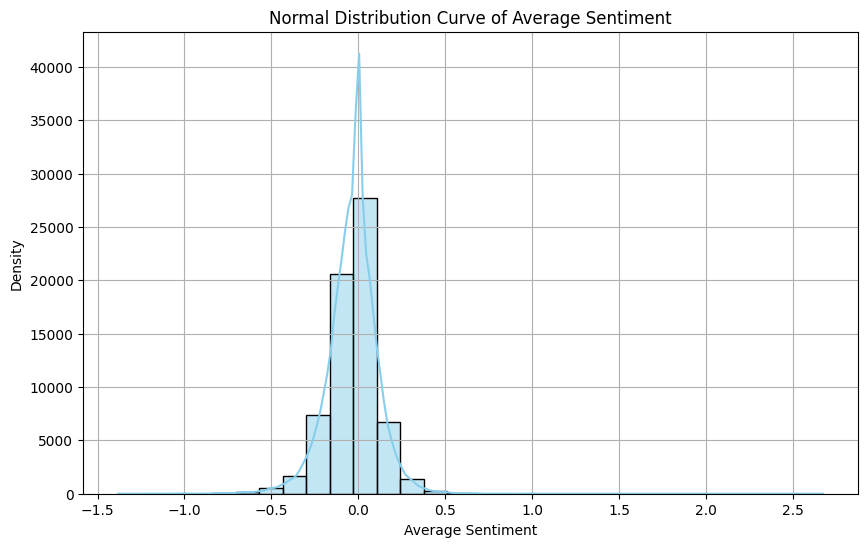

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is already defined and contains the 'average_sentiment' column
# Generate the normal distribution curve
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['average_sentiment'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Normal Distribution Curve of Average Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [109]:
# Define conditions for negative and positive sentiment
negative_sentiment = merged_df['average_sentiment'] < 0
positive_sentiment = merged_df['average_sentiment'] > 0

# Group by 'primary_call_reason' and aggregate counts and sums based on sentiment
summary_df = merged_df.groupby('primary_call_reason').agg(
    total_handle_time=('handle_time', 'sum'),
    negative_count=('average_sentiment', lambda x: (x < 0).mean()),
    positive_count=('average_sentiment', lambda x: (x > 0).mean())
    # negative_handle_time=('handle_time', lambda x: merged_df.loc[x.index, 'average_sentiment'][negative_sentiment].sum()),
    # positive_handle_time=('handle_time', lambda x: merged_df.loc[x.index, 'average_sentiment'][positive_sentiment].sum())
).reset_index()

# Display the results
print(summary_df)


      primary_call_reason  total_handle_time  negative_count  positive_count
0                 baggage            15748.0        0.426554        0.358404
1                 booking            18799.0        0.422450        0.361396
2                check in            18219.0        0.557248        0.300945
3                checkout            31997.0        0.667903        0.257415
4          communications            52910.0        0.564583        0.345052
5         digital support             7601.0        0.526531        0.322449
6              disability             1962.0        0.270471        0.488834
7                     etc            15278.0        0.615546        0.301471
8                  irrops           174178.0        0.665690        0.255954
9            mileage plus            97085.0        0.546573        0.364040
10           other topics             4773.0        0.387531        0.377751
11            post flight            67324.0        0.634180        0.275520

In [111]:
# Define conditions for negative and positive sentiment
negative_sentiment = merged_df['average_sentiment'] < 0
positive_sentiment = merged_df['average_sentiment'] > 0

# Group by 'primary_call_reason' and aggregate counts and sums based on sentiment
summary_df = merged_df.groupby('primary_call_reason').agg(
    total_handle_time=('wait_time', 'mean'),
    negative_count=('average_sentiment', lambda x: (x < 0).sum()),
    positive_count=('average_sentiment', lambda x: (x > 0).sum())
    # negative_handle_time=('handle_time', lambda x: merged_df.loc[x.index, 'average_sentiment'][negative_sentiment].sum()),
    # positive_handle_time=('handle_time', lambda x: merged_df.loc[x.index, 'average_sentiment'][positive_sentiment].sum())
).reset_index()

# Display the results
print(summary_df)


      primary_call_reason  total_handle_time  negative_count  positive_count
0                 baggage           9.034958            1208            1015
1                 booking           4.003792            1114             953
2                check in           5.930672            1061             573
3                checkout          12.078390            1261             486
4          communications           3.999479            2168            1325
5         digital support           8.428571             645             395
6              disability           8.392060             109             197
7                     etc           9.071429             586             287
8                  irrops           6.001352            8861            3407
9            mileage plus           6.016920            3198            2130
10           other topics           3.979218             317             309
11            post flight           9.490531            2746            1193

In [112]:
# Assuming 'customer_tone' is the column with tones like 'neutral', 'calm', etc.
# Group by 'primary_call_reason' and 'customer_tone' and count occurrences
tone_summary = merged_df.groupby('primary_call_reason')['customer_tone'].value_counts().unstack(fill_value=0)

# Display the resulting DataFrame
print(tone_summary)


customer_tone          angry  calm  frustrated  neutral  polite
primary_call_reason                                            
baggage                  548   558         574      575     577
booking                  528   537         499      564     509
check in                 373   404         390      357     380
checkout                 386   374         367      403     358
communications           748   782         725      799     786
digital support          224   256         230      261     254
disability                80    85          89       77      72
etc                      209   183         190      182     188
irrops                  2751  2606        2655     2618    2681
mileage plus            1112  1145        1201     1224    1169
other topics             140   167         172      169     170
post flight              879   887         839      858     867
products and services    649   676         704      655     648
schedule change          148   125      

In [113]:
# Assuming 'customer_tone' is the column with tones like 'neutral', 'calm', etc.
# Group by 'primary_call_reason' and 'customer_tone' and count occurrences
tone_summary = merged_df.groupby('primary_call_reason')['agent_tone'].value_counts().unstack(fill_value=0)

# Display the resulting DataFrame
print(tone_summary)


agent_tone             angry  calm  frustrated  neutral  polite
primary_call_reason                                            
baggage                   29  1006         111     1653       9
booking                   22   948          83     1566       5
check in                  10   570         102     1214       3
checkout                  17   486         134     1245       0
communications             8  1321         221     2282       4
digital support           15   394          79      731       1
disability                 0   196           8      197       1
etc                        6   287          55      602       0
irrops                   141  3401        1131     8585       6
mileage plus              16  2123         226     3465       7
other topics               5   308          27      475       1
post flight               35  1191         326     2755       2
products and services     19  1133         184     1984       3
schedule change            5   235      

In [119]:
merged_df
df=merged_df

In [134]:
import pandas as pd

df = df.drop(["call_start_datetime","agent_assigned_datetime","call_end_datetime"], axis=1)



In [136]:
# cannot drop Nan value for elite level code becasue these customer can be important for model so do -1
df['elite_level_code'] = df['elite_level_code'].fillna(-1)

df['elite_level_code'] = df['elite_level_code'].astype(int)


0        4
1       -1
2       -1
3        2
4        0
        ..
66648    2
66649   -1
66650    1
66651   -1
66652    0
Name: elite_level_code, Length: 66653, dtype: int64


In [142]:
from sklearn.preprocessing import LabelEncoder


In [143]:
encoder_primary = LabelEncoder()
encoder_agent_tone = LabelEncoder()
encoder_customer_tone = LabelEncoder()


In [144]:

df['primary_call_reason_encoded'] = encoder_primary.fit_transform(df['primary_call_reason'])
df['agent_tone_encoded'] = encoder_agent_tone.fit_transform(df['agent_tone'])
df['customer_tone_encoded'] = encoder_customer_tone.fit_transform(df['customer_tone'])


In [145]:
df

,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,handle_time,call_time,wait_time,primary_call_reason_encoded,agent_tone_encoded,customer_tone_encoded
0,4,voluntary cancel,neutral,angry,-0.04,0.39,31.0,7.0,7.0,18,3,0
1,-1,booking,calm,neutral,0.02,0.35,12.0,3.0,3.0,1,1,3
2,-1,irrops,neutral,polite,-0.13,0.32,19.0,8.0,8.0,8,3,4
3,2,upgrade,neutral,frustrated,-0.20,0.20,7.0,5.0,5.0,17,3,2
4,0,seating,neutral,polite,-0.05,0.35,9.0,10.0,10.0,14,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
66648,2,mileage plus,neutral,frustrated,-0.19,0.51,10.0,6.0,6.0,9,3,2
66649,-1,post flight,calm,calm,0.05,0.34,28.0,9.0,9.0,11,1,1
66650,1,upgrade,calm,frustrated,0.03,0.22,8.0,3.0,3.0,17,1,2
66651,-1,upgrade,calm,polite,0.05,0.42,6.0,6.0,6.0,17,1,4


In [146]:
df = df.drop(["primary_call_reason","customer_tone","agent_tone"], axis=1)


In [147]:
df

,elite_level_code,average_sentiment,silence_percent_average,handle_time,call_time,wait_time,primary_call_reason_encoded,agent_tone_encoded,customer_tone_encoded
0,4,-0.04,0.39,31.0,7.0,7.0,18,3,0
1,-1,0.02,0.35,12.0,3.0,3.0,1,1,3
2,-1,-0.13,0.32,19.0,8.0,8.0,8,3,4
3,2,-0.20,0.20,7.0,5.0,5.0,17,3,2
4,0,-0.05,0.35,9.0,10.0,10.0,14,3,4
...,...,...,...,...,...,...,...,...,...
66648,2,-0.19,0.51,10.0,6.0,6.0,9,3,2
66649,-1,0.05,0.34,28.0,9.0,9.0,11,1,1
66650,1,0.03,0.22,8.0,3.0,3.0,17,1,2
66651,-1,0.05,0.42,6.0,6.0,6.0,17,1,4


In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [153]:
# Define features and target
X = df.drop('primary_call_reason_encoded', axis=1)  # or select columns explicitly if needed
y = df['primary_call_reason_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [166]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [167]:
# Initialize the Support Vector Classifier
svm_model = SVC(kernel='linear')  # You can change the kernel to 'rbf', 'poly', etc.

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [163]:
# Check for NaNs in each column
print(df.isna().sum())


elite_level_code                 0
average_sentiment              101
silence_percent_average          0
handle_time                      0
call_time                        0
wait_time                        0
primary_call_reason_encoded      0
agent_tone_encoded               0
customer_tone_encoded            0
dtype: int64


In [164]:
# Display the original number of rows
print("Original number of rows:", df.shape[0])

# Drop rows with any NaN values and reset the index
df_clean = df.dropna().reset_index(drop=True)

# Display the new number of rows to confirm rows have been dropped
print("New number of rows after dropping NaNs:", df_clean.shape[0])

# Again, check for NaNs to confirm all have been removed
print(df_clean.isna().sum())


Original number of rows: 66653
New number of rows after dropping NaNs: 66552
elite_level_code               0
average_sentiment              0
silence_percent_average        0
handle_time                    0
call_time                      0
wait_time                      0
primary_call_reason_encoded    0
agent_tone_encoded             0
customer_tone_encoded          0
dtype: int64


In [168]:
# Make predictions on the test data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[   0    0    0    1    0    0    0    0  122    8    0    1    0    0
     0    0    0    0    0  430]
 [   0   33    0    0  216    0    0    0  234   31    0    0    0    0
     0    0    0    0    0    0]
 [   0   12    0    0   13    0    0    0  231   31    0    0    0    0
     0    0    0    0    0   58]
 [   0    0    0  182    0    0    0    1    0    0    0    2    0    0
     0   20    0    0    0  146]
 [   0   14    0    0  353    0    0    0  352   52    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0   70   11    0    1    0    0
     0    0    0    0    0  180]
 [   0    0    0    0    0    0    0    0   21    5    0    0    0    0
     0    0    0    0    0   59]
 [   0    0    0    5    0    0    0    4   19   25    0    1    0    0
     1    0    0    0    0  135]
 [   0   22    0    0  141    0    0    0 1928  193    0    0    0    0
     0    0    0    0    0  339]
 [   0    6    0    0   39    0    0 

/home/delhivery/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/delhivery/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/delhivery/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
